## Business Case--Liver Patient Prediction

###### Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
###### This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

###### Any patient whose age exceeded 89 is listed as being of age "90".

#### Columns:

###### age- Age of the patient
###### gender- Gender of the patient
###### tot_bilirubin -Total Bilirubin
###### direct_bilirubin -Direct Bilirubin
###### alkphos -Alkaline Phosphotase
###### sgpt -Alamine Aminotransferase
###### sgot -Aspartate Aminotransferase
###### tot_proteins -Total Protiens
###### albumin -Albumin
###### ag_ratio -Albumin and Globulin Ratio
###### is_patient  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)



In [1]:
## Importing the libraries

import numpy as np  ##  numpy is used to do scientific calculations
import pandas as pd ##  pandas is used to manupulate the dataframe
import matplotlib.pyplot as plt ## used for visualization
import seaborn as sns ## used for visualization
import plotly.express as px
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing Data
data=pd.read_csv(r"C:\Users\ASMITHA\Downloads\LiverData\indian_liver_patient.csv")

In [3]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


###### There are 583 rows and 11 columns

###### Basic Checks

In [4]:
## Getting Head

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
## Getting Tail

data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
## Getting the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
## Getting the descriptive satistical  details 
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
## Checking Duplicate

data.duplicated().sum()

13

###### There are 13 duplicate data.

In [9]:
## Getting the duplicated data
data[data.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [10]:
## Removing the duplicates

data=data.drop_duplicates()

In [11]:
data.duplicated().sum() ## Now there is no duplicate

0

In [12]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


###### After removing the duplicates now there are 570 rows and 11 columns

In [13]:
## Finding if there is any null values

data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

###### ag_ratio has 4 null values

### Handling the missing  values 

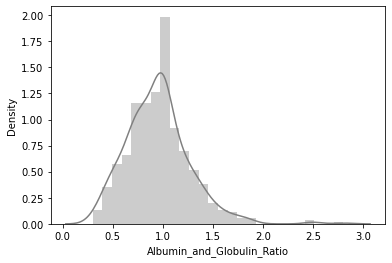

In [14]:
## Distribution plot for ag_ratio
sns.distplot(data.Albumin_and_Globulin_Ratio,color='gray')
plt.show()

In [15]:
## Filling the null values by median

data['Albumin_and_Globulin_Ratio'].median()

0.95

In [16]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [17]:
## Replacing the missing value with median

data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True,'Albumin_and_Globulin_Ratio']=0.95

In [18]:
data.isnull().sum()  ## Now there is no null value

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Exploratory Data Analysis

##### Univariate Analysis

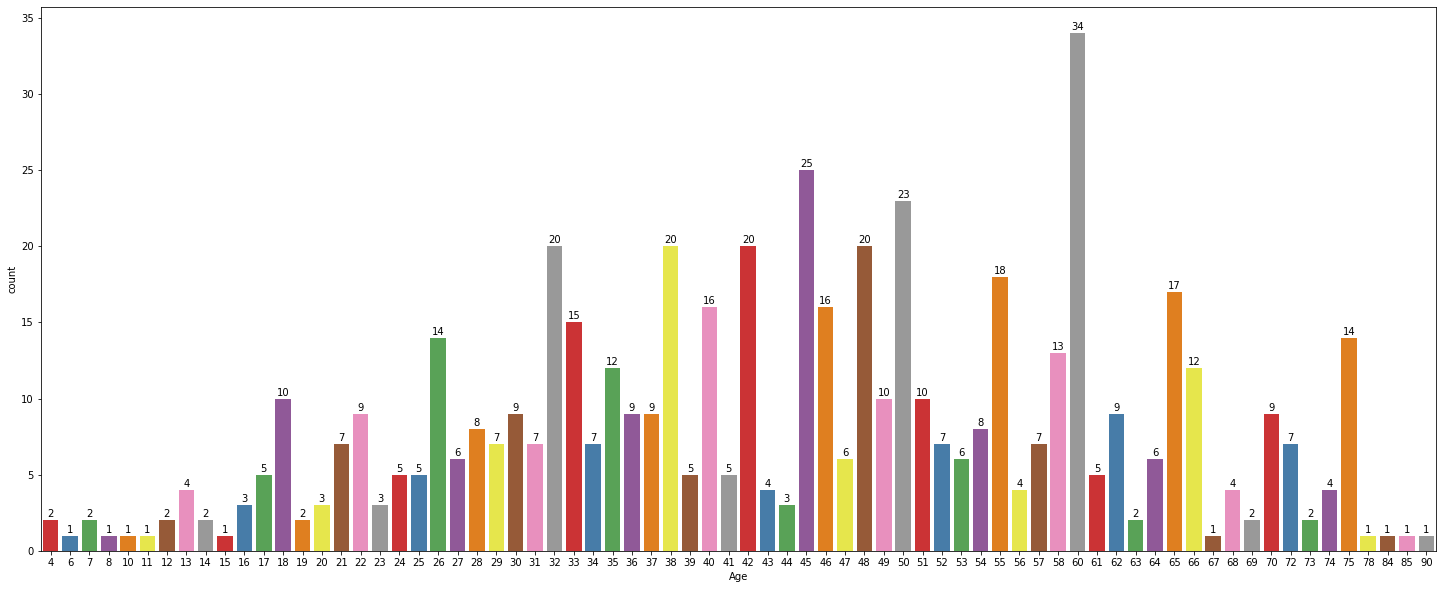

In [19]:
## Analysing age

plt.figure(figsize=(25,10))
b=sns.countplot(data.Age,palette='Set1')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 
plt.show()

###### There are more number of people i.e 34 people with age 60


In [20]:
## Analysing Gender
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

###### There are 430 Male and 140 Female

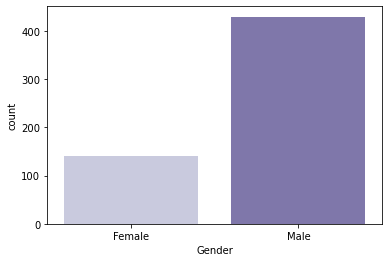

In [21]:
sns.countplot(data.Gender,palette='Purples')
plt.show() 

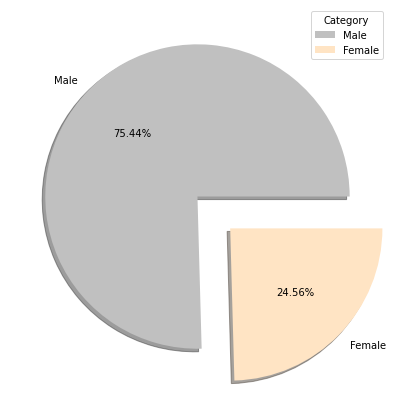

In [22]:
plt.figure(figsize=(7,7))
labels=['Male','Female']
size=data['Gender'].value_counts()
colors=['silver','bisque']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()

###### 75.44 % of the people are Male and 24.56% of the people are Female

In [23]:
## Analysing Dataset
data.Dataset.value_counts()

1    406
2    164
Name: Dataset, dtype: int64

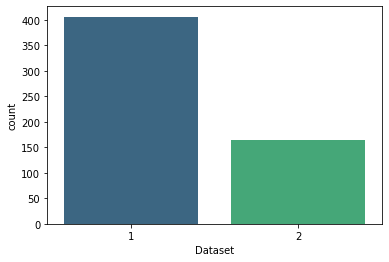

In [24]:
sns.countplot(data.Dataset,palette='viridis')
plt.show()

###### 1 shows the people who are affected and 2 shows people who are not affected.
###### 406 people are liver patient and 164 people are non-liver patient

In [25]:
## Analysing for continuous data

In [26]:
data1=data[['Total_Bilirubin','Direct_Bilirubin','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

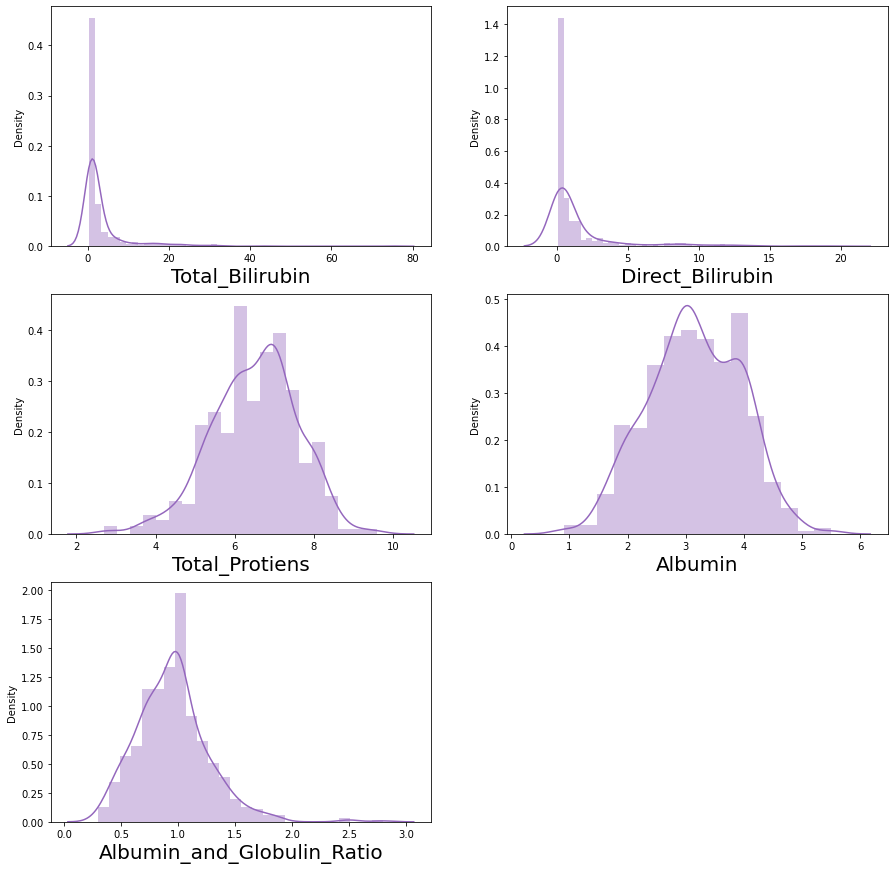

In [27]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data1:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=data1[column],color='tab:purple')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

###### Total_Bilirubin and Direct_Bilirubin shows standard normal distribution and  Total_Protiens,Albumin and Albumin_and_Globulin_Ratio shows normal distribution

In [28]:
## Analysing Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase

In [29]:
data2=data[['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']]

In [30]:
plt.figure(figsize=(200,120))
plotnumber=1

for column in data2:
    if plotnumber<=5:
        ax=plt.subplot(3,1,plotnumber)
        sns.countplot(x=data2[column],palette='Set3')
        plt.xlabel(column,fontsize=30)
        plotnumber +=1
plt.show()

##### Bivariate and Multivariate Analysis

In [31]:
## Analysing Age and Gender

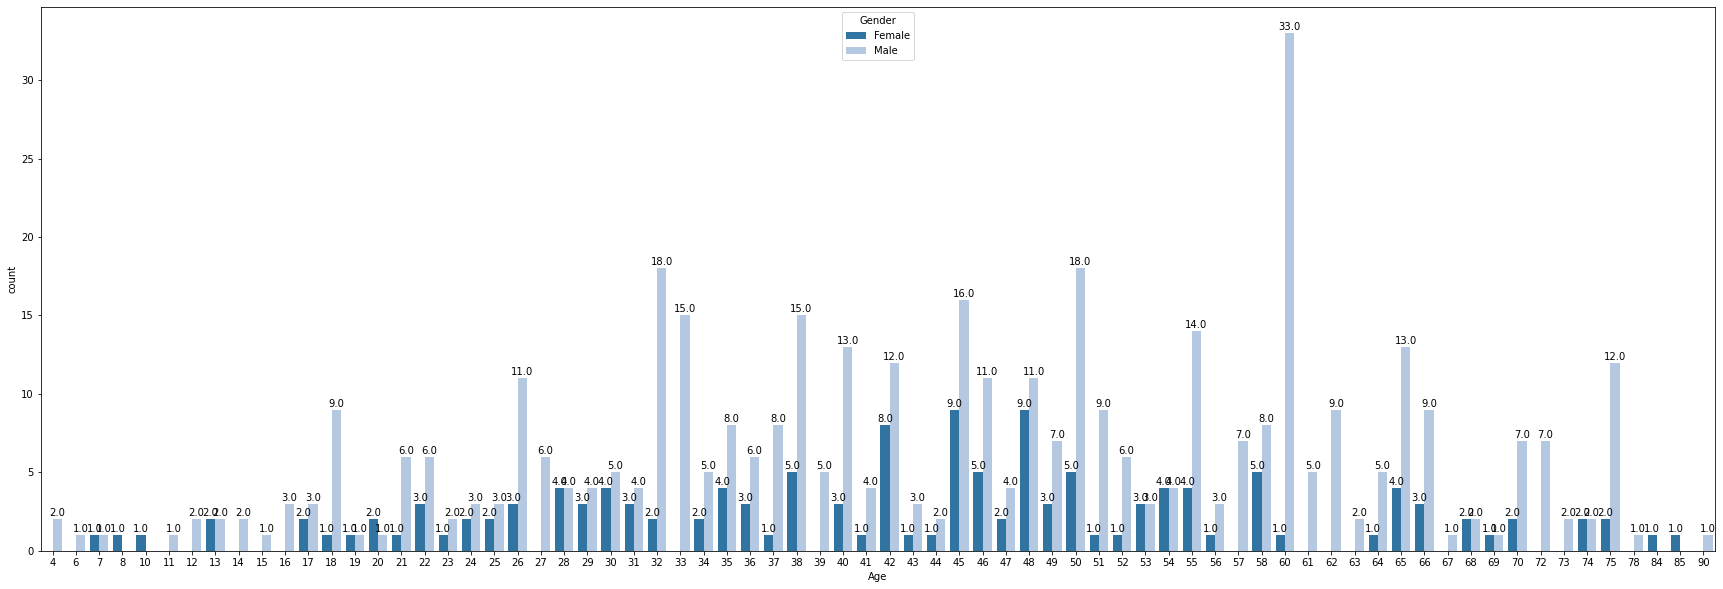

In [32]:
plt.figure(figsize=(30,10))
b=sns.countplot(x=data['Age'],hue=data['Gender'],palette='tab20')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

###### There are 33 Male with age 60 and 9 Females with age 45 and 48

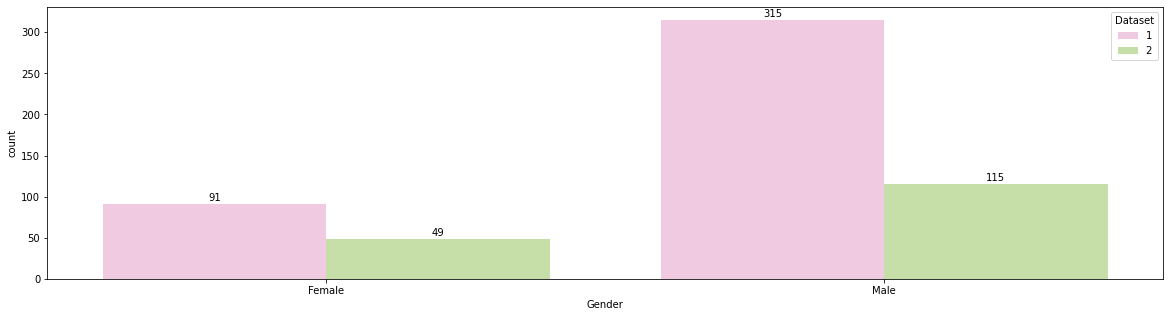

In [33]:
## Analysing Gender and  Dataset

plt.figure(figsize=(20,5))
b=sns.countplot(x=data['Gender'],hue=data['Dataset'],palette='PiYG')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

###### 315 Males and 91 Females have liver disease.

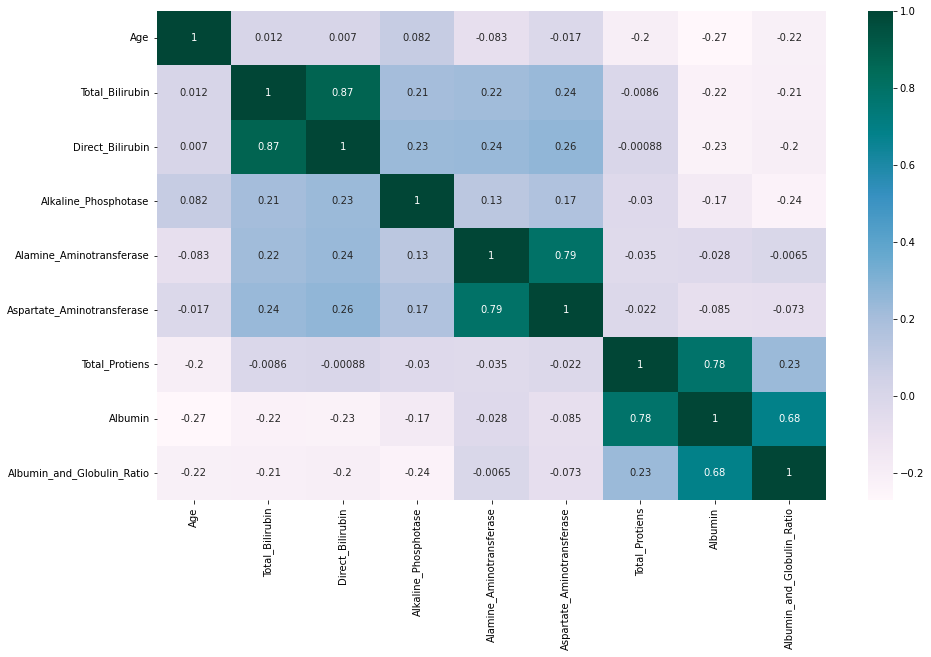

In [34]:
## Heatmap
plt.figure(figsize=(15,9))
sns.heatmap(data.drop('Dataset',axis=1).corr(),annot=True,cmap='PuBuGn')
plt.show()

###### The correlation between  Direct_Bilirubin and Total_Bilirubin is high ,  Alamine_Aminotransferase and Aspartate_Aminotransferase is high,    Total_Protiens and  Albumin is high,       Albumin and Albumin_and_Globulin_Ratio is high 

In [35]:
## Checking outliers

data3=data.drop(['Gender','Dataset'],axis=1)

In [36]:
data3

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


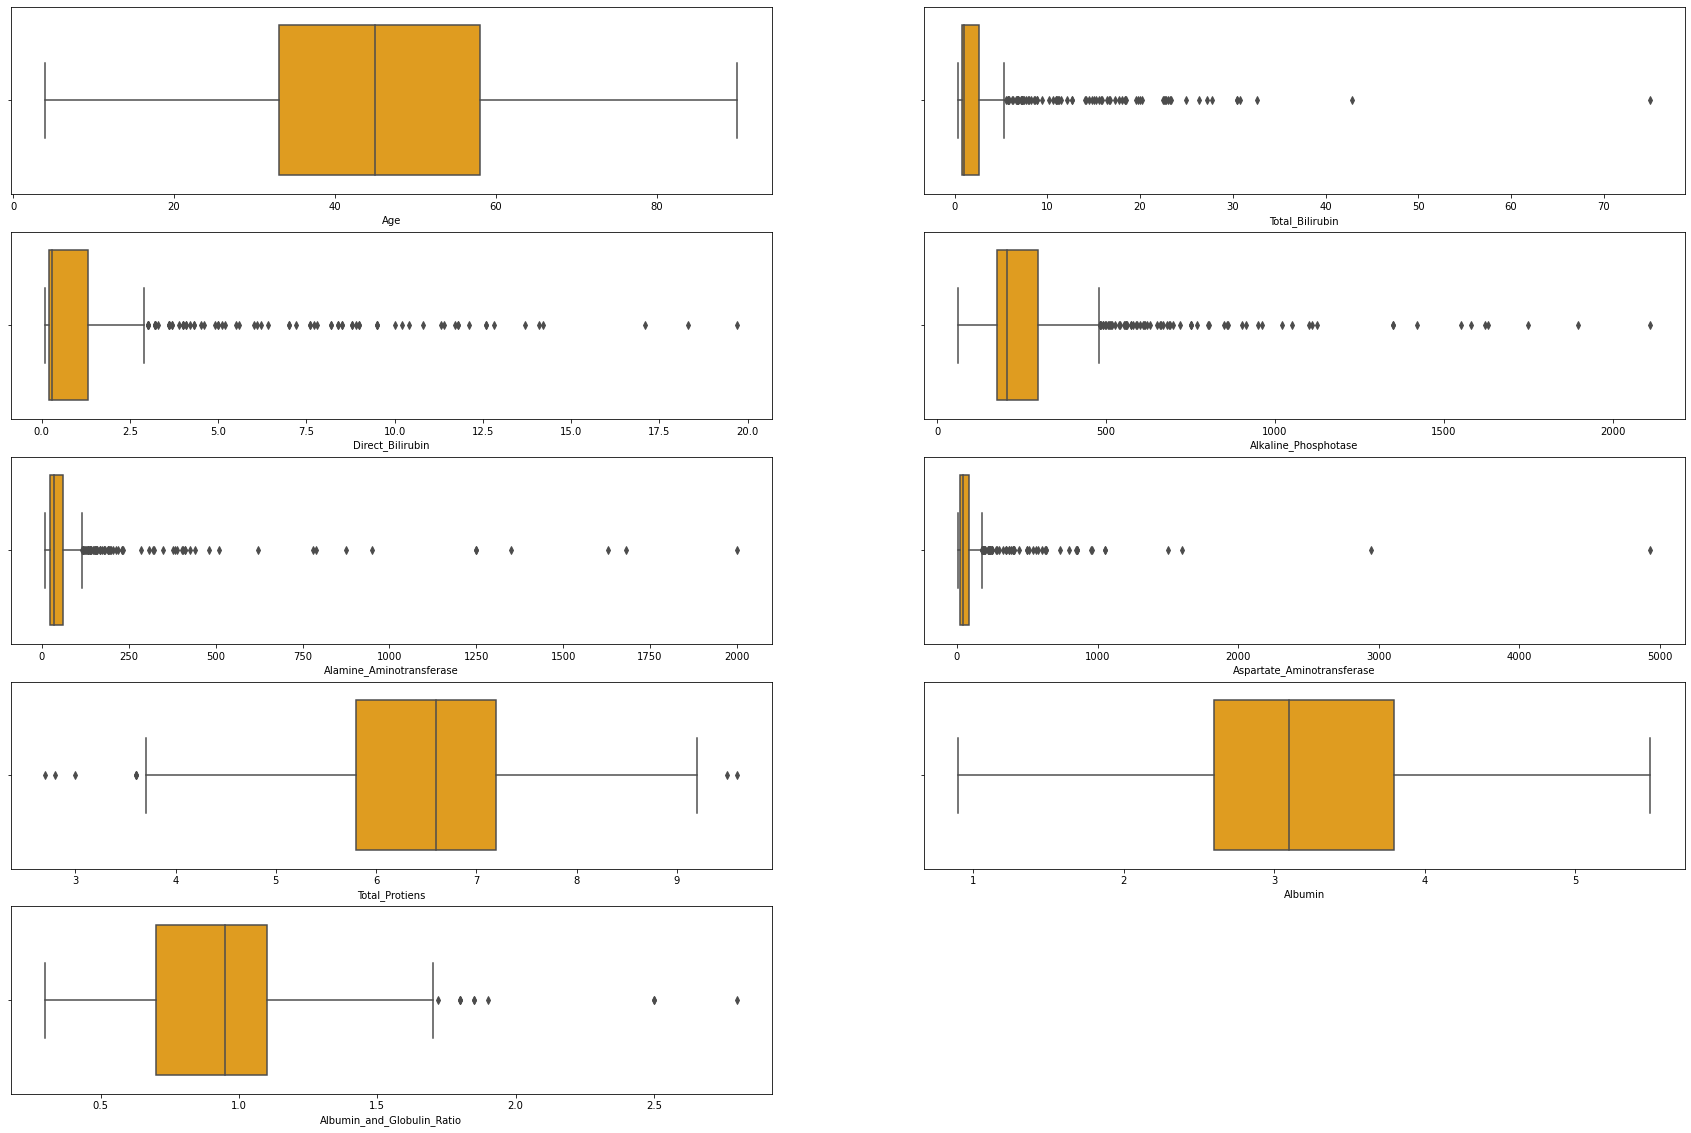

In [37]:
plt.figure(figsize=(30,20),facecolor='white')
plotnumber=1
for c in data3:
    ax=plt.subplot(5,2,plotnumber)
    sns.boxplot(data3[c],color='orange')
    plotnumber=plotnumber + 1 
plt.show()

### Changing categorical data to numerical data

In [38]:
data.Gender.unique()  ## getting the unique value

array(['Female', 'Male'], dtype=object)

In [39]:
data.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

In [40]:
## Mapping 
data.Gender=data.Gender.map({'Male':0,'Female':1})

In [41]:
data.Gender.value_counts()

0    430
1    140
Name: Gender, dtype: int64

###### Male is 0 and Female is 1

## Feature Scalling

In [42]:
## Getting independent and dependent variables

x=data.drop(['Dataset'],axis=1)
y=data['Dataset']

In [43]:
## Scalling using minmax scaler

from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

In [44]:
scaled_x

array([[0.70930233, 1.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 0.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 0.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 0.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 0.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 0.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

### Model creation

In [45]:
X=scaled_x
Y=data.Dataset

In [46]:
data.Dataset.value_counts()

1    406
2    164
Name: Dataset, dtype: int64

In [47]:
## Balancing the data
## We need to balance the data for Y.Using SMOTE we are going to balance the data

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [50]:
x_smote, y_smote = smote.fit_resample(X,Y)

In [51]:
from collections import Counter  ## counter no.of label for feature
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 406, 2: 164})
SMOTE Classes Counter({1: 406, 2: 406})


In [53]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=42)

### Logistic Regression

In [54]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()      #object creation of logistic regression
log_reg.fit(x_train,y_train)        

LogisticRegression()

In [55]:
## Predicted x test
x_test_pred_log=log_reg.predict(x_test)

In [56]:
x_test_pred_log

array([1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 2], dtype=int64)

In [58]:
## Predicted x train
x_train_pred_log=log_reg.predict(x_train)

### Evaluating Logistic Regression

In [59]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [62]:
## Accuracy for training
Accuracy_train_log=accuracy_score(y_train,x_train_pred_log)
Accuracy_train_log

0.7126436781609196

In [65]:
## Accuracy for testing
Accuracy_test_log=accuracy_score(y_test,x_test_pred_log)
Accuracy_test_log

0.6896551724137931

In [66]:
## Report for testing
report_test_log=classification_report(y_test, x_test_pred_log)# it will give precision,recall,f1 scores and accuracy  
print(report_test_log)

              precision    recall  f1-score   support

           1       0.68      0.60      0.64        93
           2       0.69      0.76      0.73       110

    accuracy                           0.69       203
   macro avg       0.69      0.68      0.68       203
weighted avg       0.69      0.69      0.69       203



In [67]:
## Report for training
report_train_log=classification_report(y_train, x_train_pred_log)# it will give precision,recall,f1 scores and accuracy  
print(report_train_log)

              precision    recall  f1-score   support

           1       0.79      0.60      0.68       313
           2       0.66      0.83      0.74       296

    accuracy                           0.71       609
   macro avg       0.73      0.72      0.71       609
weighted avg       0.73      0.71      0.71       609



In [68]:
print('Testing score for logistic regression is',log_reg.score(x_test,y_test))

Testing score for logistic regression is 0.6896551724137931


In [69]:
print('Training score for logistic regression is',log_reg.score(x_train,y_train))

Training score for logistic regression is 0.7126436781609196


## KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
x_train_pred_KNN=KNN.predict(x_train)
x_train_pred_KNN

array([1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,

In [78]:
x_test_pred_KNN=KNN.predict(x_test)
x_test_pred_KNN

array([1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 2], dtype=int64)

## Evaluating KNN

In [79]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [80]:
## Accuracy for testing
Accuracy_test_KNN=accuracy_score(y_test,x_test_pred_KNN)
Accuracy_test_KNN

0.6798029556650246

In [82]:
## Accuracy for training
Accuracy_train_KNN=accuracy_score(y_train,x_train_pred_KNN)
Accuracy_train_KNN

0.8045977011494253

In [83]:
## Report for testing
report_test_KNN=classification_report(y_test, x_test_pred_KNN)# it will give precision,recall,f1 scores and accuracy  
print(report_test_KNN)

              precision    recall  f1-score   support

           1       0.69      0.54      0.61        93
           2       0.67      0.80      0.73       110

    accuracy                           0.68       203
   macro avg       0.68      0.67      0.67       203
weighted avg       0.68      0.68      0.67       203



In [84]:
## Report for training
report_train_KNN=classification_report(y_train, x_train_pred_KNN)# it will give precision,recall,f1 scores and accuracy  
print(report_train_KNN)

              precision    recall  f1-score   support

           1       0.91      0.69      0.78       313
           2       0.74      0.93      0.82       296

    accuracy                           0.80       609
   macro avg       0.82      0.81      0.80       609
weighted avg       0.83      0.80      0.80       609



In [85]:
print('Testing score for KNN regression is',KNN.score(x_test,y_test))

Testing score for KNN regression is 0.6798029556650246


In [86]:
print('Training score for KNN regression is',KNN.score(x_train,y_train))

Training score for KNN regression is 0.8045977011494253


## DecisionTreeClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
x_test_pred_DT=DT.predict(x_test)
x_test_pred_DT

array([1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2], dtype=int64)

In [96]:
x_train_pred_DT=DT.predict(x_train)
x_train_pred_DT

array([1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,

## Evaluating DecisionTreeClassifier

In [97]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [98]:
## Accuracy for testing
Accuracy_test_DT=accuracy_score(y_test,x_test_pred_DT)
Accuracy_test_DT

0.6699507389162561

In [99]:
## Accuracy for training
Accuracy_train_DT=accuracy_score(y_train,x_train_pred_DT)
Accuracy_train_DT

1.0

In [100]:
## Report for testing
report_test_DT=classification_report(y_test, x_test_pred_DT)# it will give precision,recall,f1 scores and accuracy  
print(report_test_DT)

              precision    recall  f1-score   support

           1       0.64      0.65      0.64        93
           2       0.70      0.69      0.69       110

    accuracy                           0.67       203
   macro avg       0.67      0.67      0.67       203
weighted avg       0.67      0.67      0.67       203



In [101]:
## Report for training
report_train_DT=classification_report(y_train, x_train_pred_DT)# it will give precision,recall,f1 scores and accuracy  
print(report_test_DT)

              precision    recall  f1-score   support

           1       0.64      0.65      0.64        93
           2       0.70      0.69      0.69       110

    accuracy                           0.67       203
   macro avg       0.67      0.67      0.67       203
weighted avg       0.67      0.67      0.67       203



In [102]:
print('Testing score for DT regression is',DT.score(x_test,y_test))

Testing score for DT regression is 0.6699507389162561


In [103]:
print('Training score for DT regression is',KNN.score(x_train,y_train))

Training score for DT regression is 0.8045977011494253
